# Steps involved in developing state of the art image classifier for different type of fabrics

### 1) Preprocess the data - Images have to be split into train and test dataset  (90-10 Split)

### 2) Initial Exploratry Data Analysis (EDA) on the given dataset

### 3) Build Resnet based Architecture to get a baseline for a decent model

### 4) Build Densenet based Architecture for comparison 

### 5) Augment the data

### 6) Build confusion matrix to figure out the reasons for low accuracy



# 1) Preprocessing - The following script will move the fabrics from their folders to their main folders , That is from Wool\7\img_1.png to Wool\1.png

In [1]:
import shutil
import os

dest_dir = os.getcwd()

In [2]:
dest_dir

'D:\\repositories\\fastai\\courses\\dl1'

In [3]:
path = 'D:\\repositories\\fastai\\courses\\dl1\\data\\fabric\\fabrics\\Viscose'

In [ ]:
os.chdir(path)

In [ ]:
dest_dir = os.getcwd()

In [ ]:
dest_dir

In [ ]:
i=0
for path, subdirs, files in os.walk(dest_dir):
    for name in files:
        filename = os.path.join(path, name)
        if ".txt" not in filename:
            print(filename)
            newname = os.path.join(dest_dir,str(i)+".png")
            i = i+1
            shutil.copy2(filename, newname)
        


## Have to rerun the above script for all fabrics from Acrylic to Viscose etc.

# Lets do some EDA to understand the dataset

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.imports import *

D:\toolkits.win\conda\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [8]:
PATH = "data\\fabric\\fabrics\\"
sz=224

In [9]:
torch.cuda.is_available()

True

In [10]:
torch.backends.cudnn.enabled

True

In [11]:
os.listdir(PATH)

['models', 'tmp', 'train', 'valid']

In [12]:
os.listdir(f'{PATH}train')

['Acrylic',
 'Artificial_fur',
 'Artificial_leather',
 'Blended',
 'Chenille',
 'Corduroy',
 'Cotton',
 'Crepe',
 'Denim',
 'Felt',
 'Fleece',
 'Leather',
 'Linen',
 'Lut',
 'Nylon',
 'Polyester',
 'Satin',
 'Silk',
 'Suede',
 'Terrycloth',
 'Velvet',
 'Viscose',
 'Wool']

# 23 different type of fabrics, Removed Fur, Unclassified and Utilities 

## Reasoning 

### 1) Fur was empty
### 2) Unclassified has weird images and will be difficult for model to generalize
### 3) Utilities has single folder called sphere glossy which is not a type of fabric (Please check)


In [13]:
files = os.listdir(f'{PATH}train/Corduroy')[:5]
files

['1.png', '11.png', '12.png', '13.png', '15.png']

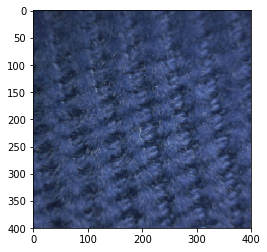

In [14]:
img = plt.imread(f'{PATH}train/Corduroy/{files[0]}')
plt.imshow(img);

In [15]:
img.shape

(400, 400, 3)

In [16]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

# Sample image being fed into the network

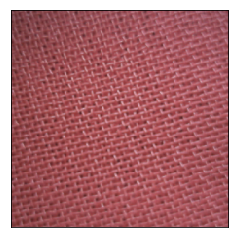

In [21]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.trn_dl))
show_img(data.trn_ds.denorm(to_np(x))[1]);

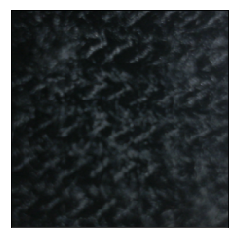

In [22]:
x,y=next(iter(data.val_dl))
show_img(data.val_ds.denorm(to_np(x))[1]);

In [23]:
data.classes

['Acrylic',
 'Artificial_fur',
 'Artificial_leather',
 'Blended',
 'Chenille',
 'Corduroy',
 'Cotton',
 'Crepe',
 'Denim',
 'Felt',
 'Fleece',
 'Leather',
 'Linen',
 'Lut',
 'Nylon',
 'Polyester',
 'Satin',
 'Silk',
 'Suede',
 'Terrycloth',
 'Velvet',
 'Viscose',
 'Wool']

In [24]:
data.sz

224

## Starting with smaller (224x224) image size

In [26]:
len(data.trn_y)

6588

## Our training dataset has 6588 training images and Our validation dataset has ~800 training images

In [27]:
len(data.val_y)

797

In [30]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [31]:
lrf=learn.lr_find()

 89%|████████████████████████████████████████████████████████████████▎       | 92/103 [00:07<00:00, 12.92it/s, loss=21]


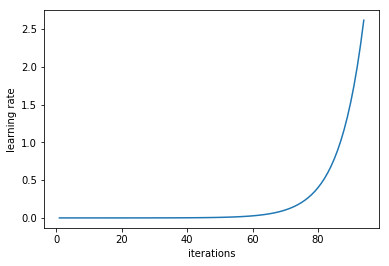

In [32]:
learn.sched.plot_lr()

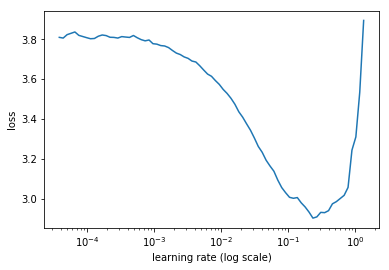

In [33]:
learn.sched.plot()

In [34]:
learn.fit(0.05,3)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.560195   1.458744   0.50941   
    1      1.26678    1.228056   0.544542                                                                              
    2      1.057405   1.067797   0.609787                                                                              



[array([1.0678]), 0.6097867002002567]

In [35]:
learn.fit(0.05,5)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.936287   1.000361   0.619824  
    1      0.863657   0.979209   0.644918                                                                              
    2      0.833389   0.953956   0.636136                                                                              
    3      0.765647   0.889769   0.670013                                                                              
    4      0.740051   0.850659   0.663739                                                                              



[array([0.85066]), 0.6637390211056287]

In [36]:
learn.fit(0.01,5)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.615684   0.803051   0.683814  
    1      0.574182   0.793976   0.693852                                                                              
    2      0.556737   0.77771    0.70138                                                                               
    3      0.537269   0.744844   0.720201                                                                              
    4      0.516759   0.758714   0.716437                                                                              



[array([0.75871]), 0.716436637016282]

# With resnet34, The accuracy is about 71%, Lets try Densenet with bigger images (400x400)

In [37]:
sz=400

In [38]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

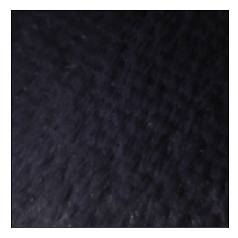

In [41]:
x,y=next(iter(data.trn_dl))
show_img(data.trn_ds.denorm(to_np(x))[0]);

In [40]:
data.sz

400

In [42]:
arch=dn201
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.4)


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to C:\Users\Gokul/.torch\models\densenet201-c1103571.pth
100%|█████████████████████████████████████████████████████████████████| 81131730/81131730 [00:08<00:00, 9739056.04it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:17<00:00,  1.33s/it]


In [43]:
lrf = learn.lr_find()


 89%|██████████████████████████████████████████████████████████████▌       | 92/103 [00:00<00:00, 93.03it/s, loss=13.4]


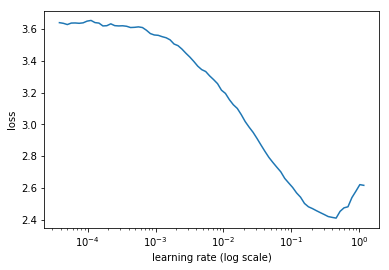

In [44]:
learn.sched.plot()


In [45]:
learn.fit(0.05,5)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.200311   1.178131   0.608532  
    1      0.885052   0.858894   0.692597                                                                              
    2      0.697619   0.64824    0.771644                                                                              
    3      0.582982   0.573423   0.791719                                                                              
    4      0.507557   0.559686   0.801757                                                                              



[array([0.55969]), 0.8017565880246563]

In [46]:
learn.fit(0.05,2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.444393   0.509531   0.81054   
    1      0.416722   0.484271   0.823087                                                                              



[array([0.48427]), 0.8230865754776049]

In [47]:
learn.fit(0.01,5)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.299602   0.433581   0.830615  
    1      0.30079    0.450783   0.834379                                                                              
    2      0.268018   0.439481   0.833124                                                                              
    3      0.261942   0.419258   0.838143                                                                              
    4      0.242604   0.392585   0.853199                                                                              



[array([0.39259]), 0.853199497444866]

In [48]:
learn.fit(0.001,5)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.240683   0.387282   0.851945  
    1      0.22013    0.399627   0.845671                                                                              
    2      0.227535   0.398572   0.843162                                                                              
    3      0.239972   0.392595   0.846926                                                                              
    4      0.214961   0.392209   0.846926                                                                              



[array([0.39221]), 0.8469259717234106]

In [55]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)


In [56]:
lrf = learn.lr_find()


 91%|███████████████████████████████████████████████████████████████▉      | 94/103 [00:00<00:00, 94.36it/s, loss=13.4]


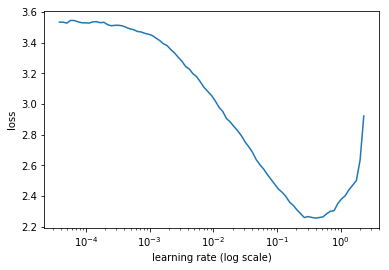

In [57]:
learn.sched.plot()


In [58]:
learn.fit(0.05,5)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.02431    1.055055   0.648683  
    1      0.605019   0.731719   0.72271                                                                               
    2      0.447422   0.60385    0.806775                                                                              
    3      0.349266   0.518541   0.818068                                                                              
    4      0.293683   0.594074   0.809285                                                                              



[array([0.59407]), 0.8092848173946778]

In [59]:
learn.fit(0.05,5)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.242985   0.494263   0.83187   
    1      0.209115   0.473323   0.854454                                                                              
    2      0.189963   0.48973    0.828105                                                                              
    3      0.177619   0.476309   0.854454                                                                              
    4      0.152726   0.447738   0.858218                                                                              



[array([0.44774]), 0.8582183195177554]

In [60]:
learn.fit(0.01,5)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.091538   0.405173   0.861982  
    1      0.085939   0.427593   0.859473                                                                              
    2      0.076989   0.410113   0.868256                                                                              
    3      0.075692   0.395562   0.865747                                                                              
    4      0.070411   0.401798   0.867001                                                                              



[array([0.4018]), 0.8670012555277931]

# Lets build a confusion matrix to figure out why our accuracy is only 86.7%

In [61]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [62]:
log_preds,y = learn.TTA()


In [63]:
probs = np.mean(np.exp(log_preds),0)


In [64]:
accuracy_np(probs, y)

0.8670012547051443

In [65]:
predictions = np.argmax(probs,axis=1)


In [66]:
cm = confusion_matrix(y, predictions)


Confusion matrix, without normalization
[[  6   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  80   0   0  16   0   0   0   0   0   0   0   0   1   0   0   1   0   0   0   1]
 [  0   0   0   0  13   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0  21   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0  86   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  17   0   0   0   0   0   0   0   3   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  84   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   4   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0 

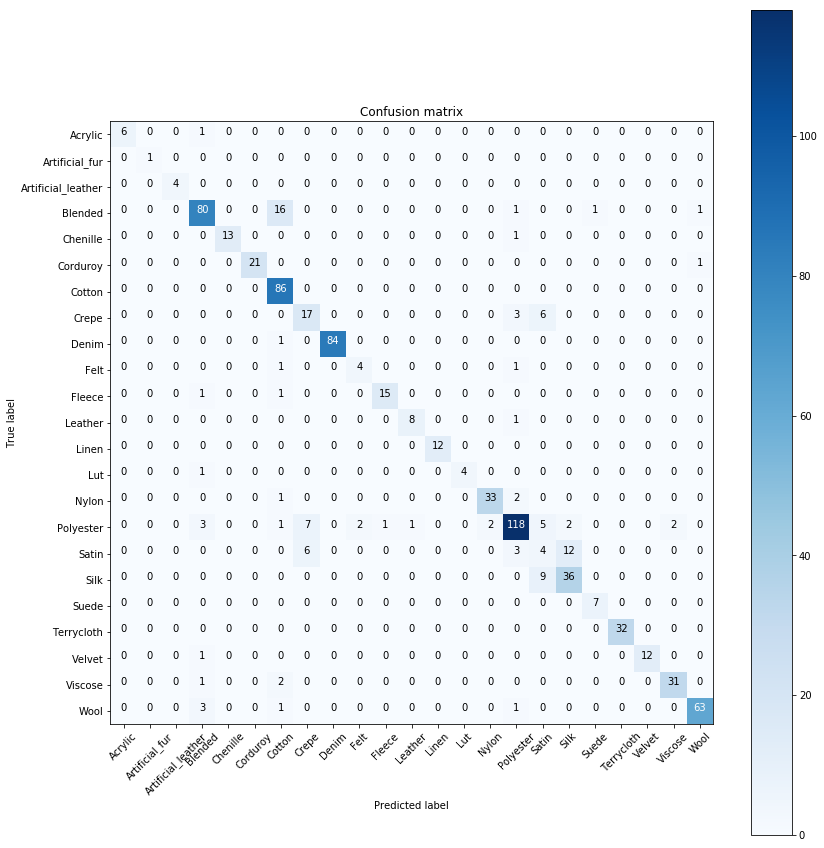

In [67]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)


Normalized confusion matrix
[[0.85714 0.      0.      0.14286 0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      1.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      1.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.80808 0.      0.      0.16162 0.      0.      0.      0.      0.      0.
  0.      0.      0.0101  0.      0.      0.0101  0.      0.      0.      0.0101 ]
 [0.      0.      0.      0.      0.92857 0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.07143 0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.95455 0.

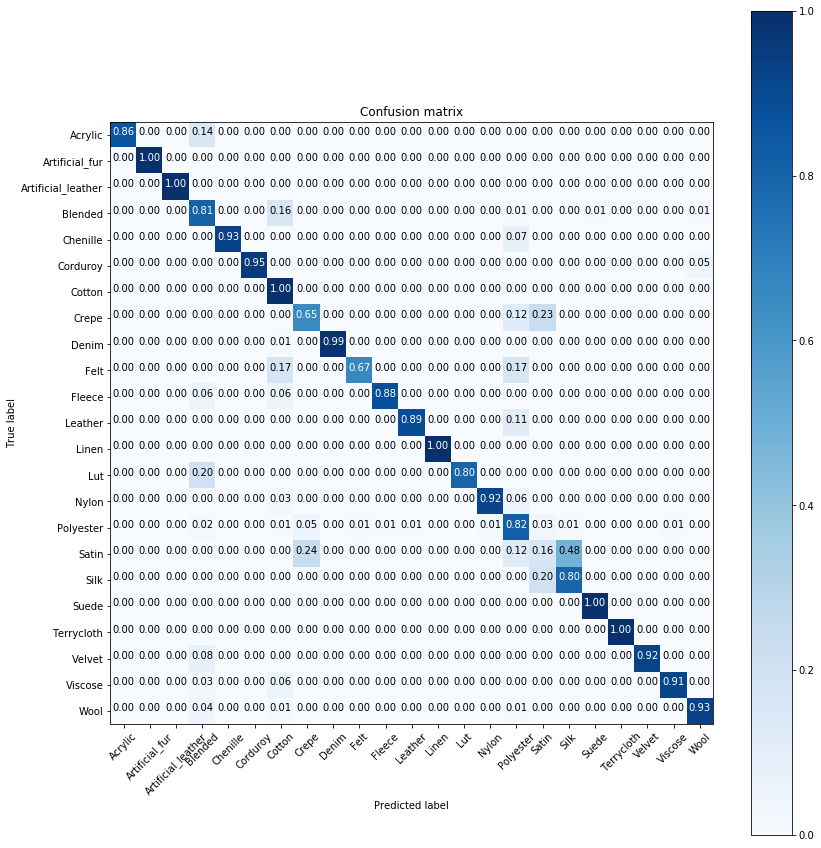

In [68]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)


## Looking at Confusion matrix:
## Poorly performing fabrics, Blended is being confused with Cotton 
## Accuracy of Satin is low as well

### We can ignore Felt as the number of images on felt is quite low

### Lets try augmenting with with different lighting

In [70]:
class BWTransform(Transform):

    def __init__(self, tfm_y=TfmType.NO):
        self.tfm_y = tfm_y

    def set_state(self):
        pass

    def do_transform(self, x):
        x[:, :, 0-2] = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
        return x

In [94]:
transforms_basic    = [RandomRotate(10), RandomLighting(0.05, 0.05)]
transforms_side_on  = transforms_basic + [RandomFlip()] 

In [95]:
train_tfms,val_tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)



In [96]:
data = ImageClassifierData.from_paths(PATH, tfms=(train_tfms,val_tfms))

In [97]:
def get_augs():
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [98]:
ims = np.stack([get_augs() for i in range(6)])

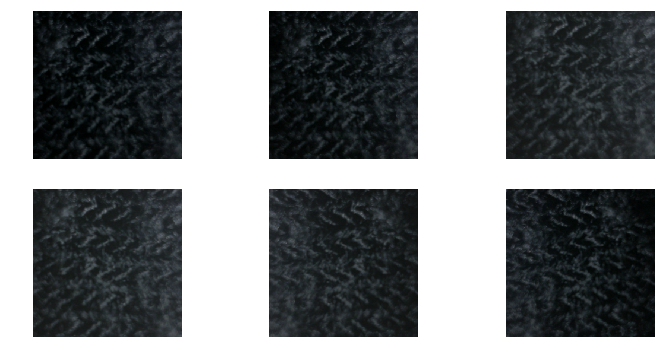

In [99]:
plots(ims, rows=2)

In [100]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)


In [101]:
lrf = learn.lr_find()


 83%|██████████████████████████████████████████████████████████▍           | 86/103 [00:00<00:00, 89.54it/s, loss=11.6]


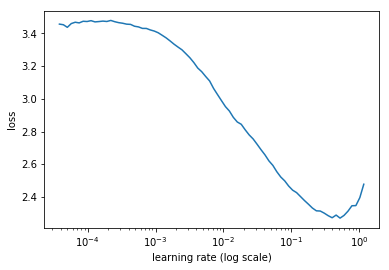

In [102]:
learn.sched.plot()

In [103]:
learn.fit(0.05,10)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.992441   1.005885   0.654956  
    1      0.639412   0.720676   0.747804                                                                              
    2      0.445836   0.594208   0.787955                                                                              
    3      0.376161   0.553775   0.797992                                                                              
    4      0.303221   0.499729   0.82936                                                                               
    5      0.258105   0.495095   0.814304                                                                              
    6      0.234581   0.548016   0.818068                                                                              
    7      0.194388   0.459659   0.830615                                                                           

[array([0.47189]), 0.8318695114876425]

In [104]:
learn.fit(0.01,10)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.091051   0.416486   0.845671  
    1      0.077998   0.404087   0.853199                                                                              
    2      0.071084   0.417964   0.848181                                                                              
    3      0.067677   0.396058   0.849435                                                                              
    4      0.06939    0.383482   0.856964                                                                              
    5      0.063291   0.387067   0.860728                                                                              
    6      0.063375   0.394058   0.853199                                                                              
    7      0.057302   0.393216   0.856964                                                                           

[array([0.39014]), 0.8607277298063376]

In [105]:
learn.fit(0.001,5)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.052069   0.412118   0.848181  
    1      0.052644   0.3789     0.860728                                                                              
    2      0.055662   0.402475   0.856964                                                                              
    3      0.054043   0.38781    0.860728                                                                              
    4      0.051127   0.385306   0.861982                                                                              



[array([0.38531]), 0.8619824334549037]

In [107]:
learn.precompute=False

In [108]:
learn.fit(0.01, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.215858   0.459869   0.841907  
    1      0.202965   0.44701    0.848181                                                                              
    2      0.200284   0.438729   0.85069                                                                               



[array([0.43873]), 0.8506900878293601]

In [109]:
learn.fit(0.005,3)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.162494   0.445344   0.853199  
    1      0.158466   0.437647   0.849435                                                                              
    2      0.157661   0.434863   0.858218                                                                              



[array([0.43486]), 0.8582183186951067]

In [110]:
learn.fit(0.001,3)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.156285   0.409195   0.864492  
    1      0.145301   0.422591   0.856964                                                                              
    2      0.137418   0.420998   0.856964                                                                              



[array([0.421]), 0.8569636135508155]

In [112]:
log_preds,y = learn.TTA()


In [113]:
probs = np.mean(np.exp(log_preds),0)


In [114]:
accuracy_np(probs, y)

0.8682559598494354

In [115]:
predictions = np.argmax(probs,axis=1)


In [116]:
cm = confusion_matrix(y, predictions)


Confusion matrix, without normalization
[[  6   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  80   0   0  16   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0   1]
 [  0   0   0   0  13   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0  21   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  86   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   1  14   0   0   0   0   0   0   0   4   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  85   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0 

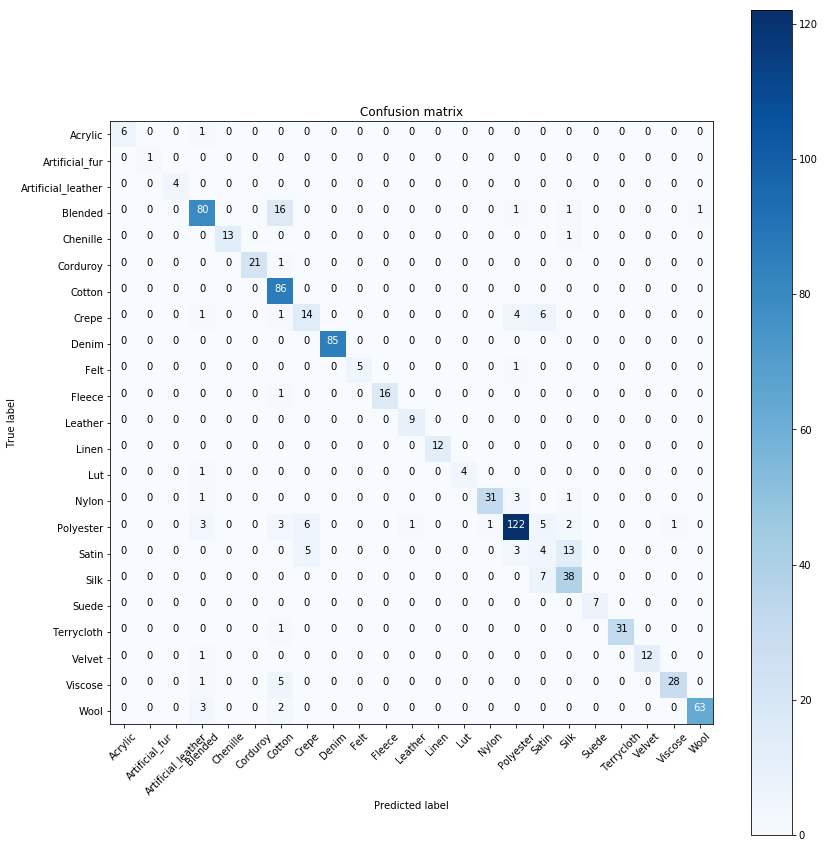

In [117]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)


# Conclusion:

The best accuracy after augmentation is 86.8% . 

Our model doesnot generalize well between Blended and Cotton (Few images look similar on these categories)

Our model also does not generalize well between Satin and Silk (This also makes sense as Satin and Silk fabric images are very close)